In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seeds_data = pd.read_csv("seeds.csv")

In [3]:
seeds_data.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [4]:
seeds_data.shape

(210, 7)

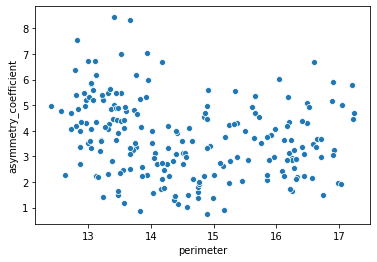

In [5]:
sns.scatterplot(x='perimeter',y='asymmetry_coefficient',data=seeds_data)

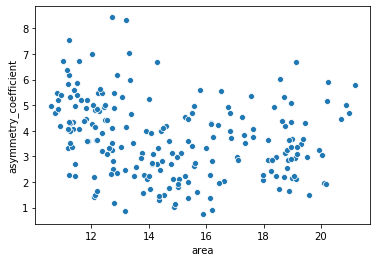

In [6]:
sns.scatterplot(x='area',y='asymmetry_coefficient',data=seeds_data)

In [7]:
seeds_data.isna().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry_coefficient    0
groove_length            0
dtype: int64

## Step:1 Scaling of data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
seeds_data_sc = sc.fit_transform(seeds_data)

In [11]:
seeds_data_sc

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

## Step:2 To Find number of clusters

In [12]:
# elbow method
# average silhouette method
# gap statistics method
# dendrogram

### Elbow method

In [13]:
from sklearn.cluster import KMeans

In [14]:
# In elbow we plot a graph between no. of clusters and wcss: within cluster sum of squares

In [15]:
# To define number of clusters are selected from this range 
num_of_clusters = range(1,7) 

In [16]:
# We defined a blank list named wccs to append values of wccs of each cluster
wcss = []

In [17]:
for k in num_of_clusters:
    
    # Create a KMeans class instance with k clusters
    model = KMeans(n_clusters=k,random_state=15)
    
    # Build the model using the data
    model.fit(seeds_data_sc)
    
    # Append the inertia or value of wcss to the empty list named "wcss" for no. of clusters is equals to k
    wcss.append(model.inertia_)

In [18]:
# We have filled the list named wcss
wcss

[1470.0,
 659.1717544870405,
 430.65897315130053,
 371.301721277542,
 326.2665126197038,
 289.77433495935907]

### Graph between wcss and no. of clusters to see the elbow

Text(0, 0.5, 'WCSS')

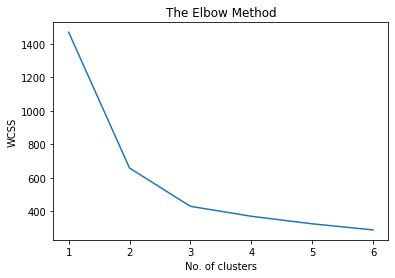

In [19]:
plt.plot(num_of_clusters,wcss)
plt.title("The Elbow Method")
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

In [20]:
# As we can visualize there are two elbows in this graph
# Thus we can conclude we can take no. of clusters as 2 or 3
# no. of clusters = 2 is more significant than =3
# But here optimal number of clusters is equals to 2

### Average silhouette method

In [21]:
from sklearn.cluster import KMeans

In [22]:
from sklearn.metrics import silhouette_score

# For k=1 silhouette_score=0
# -1<=silhouette_score>=+1

In [23]:
num_of_clusters = list(range(2,7))

In [24]:
silhouettte_score_list = []

In [25]:
for k in num_of_clusters:
    
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters=k,random_state=15)
    
    # Build the model using the data and predict the clusters 
    clusters_label = model.fit_predict(seeds_data_sc)
    
    silhouettte_score_list.append(silhouette_score(seeds_data_sc,clusters_label))

In [26]:
silhouettte_score_list

[0.46577247686580914,
 0.4007270552751299,
 0.3275742660551808,
 0.2881466510357611,
 0.27752587955517594]

Text(0, 0.5, 'silhouette coefficient')

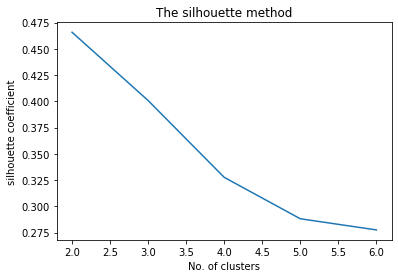

In [27]:
plt.plot(num_of_clusters,silhouettte_score_list)
plt.title("The silhouette method")
plt.xlabel('No. of clusters')
plt.ylabel('silhouette coefficient')

In [28]:
# According to this graph optimal no. of clusters is equals to 2
# Because at 2 average silhouette is maximum

#### We can also plot number of cluster =1 & average silhouette =0 in above plot

In [29]:
num_of_clusters.insert(0,1)
silhouettte_score_list.insert(0,0)

Text(0, 0.5, 'silhouette coefficient')

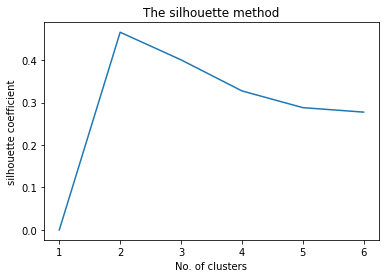

In [30]:
plt.plot(num_of_clusters,silhouettte_score_list)
plt.title("The silhouette method")
plt.xlabel('No. of clusters')
plt.ylabel('silhouette coefficient')

In [31]:
# By using average silhouette method optimal number of clusters is equals to 2

### Dendrogram

In [32]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distance')

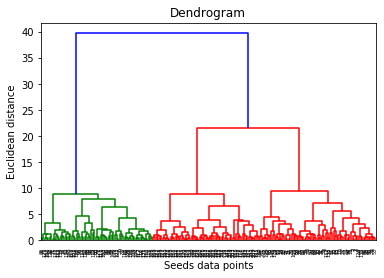

In [33]:
sch.dendrogram(sch.linkage(seeds_data_sc,method='ward'));
plt.title('Dendrogram')
plt.xlabel('Seeds data points')
plt.ylabel('Euclidean distance')

In [34]:
# Result of this dendrogram is that there is 2 is the optimal number of clusters

#### Let's build the model by using 2 clusters 

## K-Means clustering

In [35]:
from sklearn.cluster import KMeans

In [36]:
model = KMeans(n_clusters=2, random_state=15)

In [37]:
model.fit_predict(seeds_data_sc)

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
cluster_label = model.fit_predict(seeds_data_sc)

In [39]:
cluster_label

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
seeds_data.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [41]:
# Adding a new column in our given dataset by making 2 clusters
seeds_data['Cluster'] = cluster_label

In [42]:
seeds_data.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,Cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [43]:
seeds_data.shape

(210, 8)

In [44]:
seeds_data[seeds_data['Cluster']==0].describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,Cluster
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0
mean,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,0.0
std,1.483999,0.641792,0.015177,0.257327,0.186514,1.281527,0.294989,0.0
min,15.380000,14.860000,0.845200,5.618000,3.231000,0.765100,5.091000,0.0
25%,16.840000,15.550000,0.873500,5.920000,3.505000,2.553000,5.837000,0.0
50%,18.550000,16.180000,0.882900,6.113000,3.684000,3.368000,5.965000,0.0
75%,19.110000,16.500000,0.898400,6.285000,3.796000,4.391000,6.185000,0.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,0.0


In [45]:
seeds_data[seeds_data['Cluster']==1].describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,Cluster
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0
mean,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,1.0
std,1.428131,0.635028,0.024497,0.208434,0.238913,1.609146,0.199294,0.0
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.855100,4.519000,1.0
25%,11.750000,13.190000,0.847300,5.176000,2.821000,2.587000,4.963000,1.0
50%,12.720000,13.570000,0.865700,5.333000,3.026000,3.638000,5.089000,1.0
75%,14.110000,14.210000,0.881900,5.479000,3.201000,4.924000,5.220000,1.0
max,15.990000,14.940000,0.918300,5.789000,3.582000,8.456000,5.491000,1.0


In [46]:
seeds_data.groupby('Cluster').mean()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
Cluster,,,,,,,
0,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740
1,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737


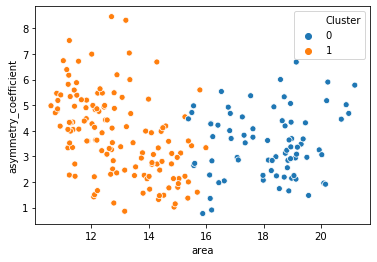

In [47]:
sns.scatterplot(x='area',y='asymmetry_coefficient',hue='Cluster',data=seeds_data)

We can write Cluster=0 as 'Big Seeds' and Cluster=1 as 'Small Seeds'

In [48]:
seeds_data.loc[seeds_data['Cluster']==0,'Cluster'] = 'Big Seeds'
seeds_data.loc[seeds_data['Cluster']==1,'Cluster'] = 'Small Seeds'

In [49]:
seeds_data.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,Cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Small Seeds
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Small Seeds
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Small Seeds
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Small Seeds
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Big Seeds


In [50]:
seeds_data.groupby('Cluster').mean()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
Cluster,,,,,,,
Big Seeds,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740
Small Seeds,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737


In [51]:
seeds_data['Cluster'].value_counts()

Small Seeds    133
Big Seeds       77
Name: Cluster, dtype: int64

In [52]:
seeds_data['Cluster'].unique()

array(['Small Seeds', 'Big Seeds'], dtype=object)

In [53]:
# Note: Before scaling always do outlier detection

### Principal componenet analysis
We can visualize mulitivariable into two axis

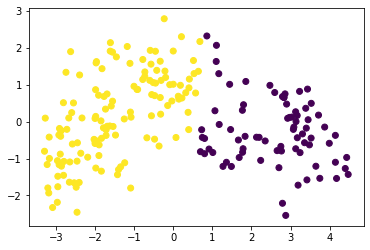

In [54]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2).fit_transform(seeds_data_sc)
plt.scatter(pca_data[:,0],pca_data[:,1],c=cluster_label) 

## Hierarchical clustering

In [55]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)

In [56]:
cluster_labels = model.fit_predict(seeds_data_sc)

In [57]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)